### 1. Imports and File Paths

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import sys

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully.")

Libraries imported successfully.


### 2. Load Raw Data & Identify Critical Columns

In [2]:
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
RAW_DATA_DIR = os.path.join(ROOT_DIR, 'data', 'raw')

applicant_path = os.path.join(RAW_DATA_DIR, 'applicant_data.csv')
bureau_path = os.path.join(RAW_DATA_DIR, 'bureau_data.csv')

print(f"Loading applicant data from: {applicant_path}")
print(f"Loading bureau data from: {bureau_path}")

try:
    applicant_df = pd.read_csv(applicant_path)
    bureau_df = pd.read_csv(bureau_path)
    
    print("\nData loaded successfully.")
    
    print("\n--- Applicant Data Columns (Last 5) ---")
    print(applicant_df.columns[-5:].tolist())
    
    print("\n--- Bureau Data Columns (First 5) ---")
    print(bureau_df.columns[:5].tolist())

except FileNotFoundError as e:
    print(f"\n[ERROR] File not found. Please check your folder structure.")
    print(e)

Loading applicant data from: /Users/yogeshdhaliya/Desktop/DS Learning/11. Projects/Credit-Risk-Prediction/data/raw/applicant_data.csv
Loading bureau data from: /Users/yogeshdhaliya/Desktop/DS Learning/11. Projects/Credit-Risk-Prediction/data/raw/bureau_data.csv

Data loaded successfully.

--- Applicant Data Columns (Last 5) ---
['GL_Flag', 'last_prod_enq2', 'first_prod_enq2', 'Credit_Score', 'Approved_Flag']

--- Bureau Data Columns (First 5) ---
['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M']


In [3]:
applicant_df.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [4]:
bureau_df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [5]:
applicant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [6]:
bureau_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [7]:
applicant_df.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,5.133600e+04,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,-25105.208587,-21092.727676,0.728884,0.426971,9.204671,1.484027,3.319444,0.062646,0.002435,0.009292,0.025947,0.001208,0.004130,0.015097,0.000974,0.002844,11.266090,-12308.234046,-12312.463866,-12312.734261,-12312.644869,-12311.878195,-12312.429270,-12312.209229,-12084.842099,-12310.233248,-12311.123987,-12311.784771,33.758532,2.642419e+04,110.707846,0.577542,0.302955,-139.416072,-92791.608990,0.089469,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,43366.162767,40805.742595,2.762120,2.101404,21.308881,3.364581,7.518414,0.801218,0.091383,0.233403,0.635611,0.070331,0.179885,0.529730,0.075413,0.185349,46.100309,32860.363869,32858.778356,32858.677000,32858.710505,32858.997860,32858.791308,32858.873781,32946.916037,32859.614436,32859.280542,32859.032853,8.816364,2.002711e+04,76.046831,0.379867,0.406049,3742.613530,25861.225129,0.285423,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,27.000000,1.800000e+04,61.000000,0.250000,0.000000,0.083000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.00000

In [8]:
bureau_df.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,1.503701,0.736851,0.395184,0.149989,0.546751,0.593268,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,2.119399,1.454120,0.391930,0.257267,1.085529,0.900585,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,1.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,2.000000,1.000000,0.750000,0.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,39.000000,39.000000,1.000000,1.000000,34.000000,27.000000,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


### 3. Merge Data & Handle Null Placeholders

In [9]:
TARGET_COL = 'Approved_Flag'

df = pd.merge(applicant_df, bureau_df, on='PROSPECTID', how='inner')
print(f"Data merged. Full shape (rows, cols): {df.shape}")

initial_nulls = df.isna().sum().sum()
print(f"Initial np.nan values: {initial_nulls}")

df.replace(-99999, np.nan, inplace=True)

nan_replaced_count = df.isna().sum().sum() - initial_nulls
print(f"Replaced {nan_replaced_count:,} instances of -99999 with np.nan.")

y = df[TARGET_COL]
print(f"\n--- Target Variable Identified ---")
print(f"Target 'y' ('{TARGET_COL}') separated.")
print(f"Target class distribution:\n{y.value_counts(normalize=True).sort_index()}")

print(f"\nSetup complete. 'df' (shape: {df.shape}) now ready for validation.")

Data merged. Full shape (rows, cols): (51336, 87)
Initial np.nan values: 0
Replaced 320,792 instances of -99999 with np.nan.

--- Target Variable Identified ---
Target 'y' ('Approved_Flag') separated.
Target class distribution:
Approved_Flag
P1    0.113040
P2    0.627221
P3    0.145161
P4    0.114578
Name: proportion, dtype: float64

Setup complete. 'df' (shape: (51336, 87)) now ready for validation.


### 4. Finding 1 (Target Leak: Credit_Score)


--- Target Leak (Credit_Score) ---
Crosstab: Credit_Score vs. Approved_Flag
Approved_Flag  P1  P2  P3  P4
Credit_Score                 
469             0   0   0   1
483             0   0   0   1
488             0   0   0   1
489             0   0   1   0
499             0   0   1   0
...            ..  ..  ..  ..
795             2   0   0   0
801             1   0   0   0
805             1   0   0   0
809             3   0   0   0
811             1   0   0   0

[250 rows x 4 columns]


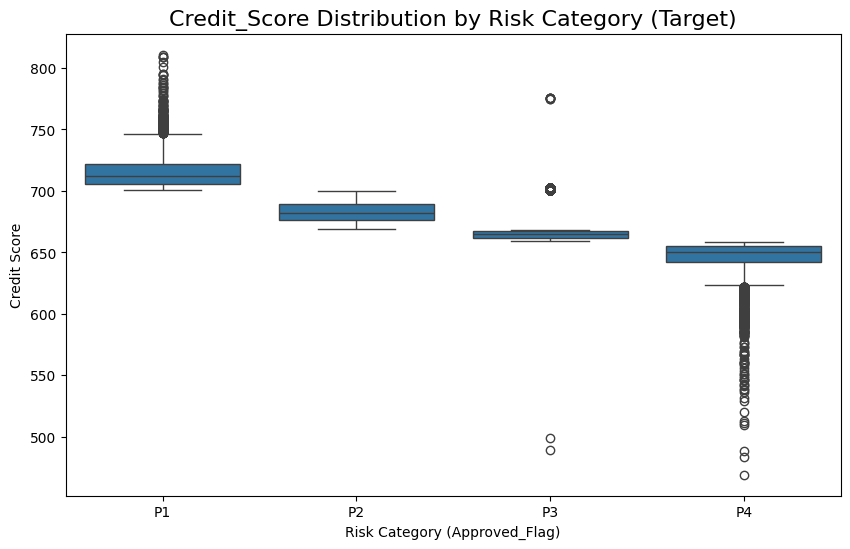

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Target Leak (Credit_Score) ---")

print("Crosstab: Credit_Score vs. Approved_Flag")
crosstab_result = pd.crosstab(df['Credit_Score'], df[TARGET_COL])
print(crosstab_result)

plt.figure(figsize=(10, 6))
sns.boxplot(x=TARGET_COL, y='Credit_Score', data=df, order=['P1', 'P2', 'P3', 'P4'])
plt.title('Credit_Score Distribution by Risk Category (Target)', fontsize=16)
plt.ylabel('Credit Score')
plt.xlabel('Risk Category (Approved_Flag)')
plt.show()

### 5. Finding 2 (Feature Leak: Post-Approval Cols)


--- Feature Leak (Post-Approval) ---
Mean 'num_times_delinquent' by Risk Category:
Approved_Flag
P1    1.819921
P2    1.260319
P3    1.989801
P4    2.519551
Name: num_times_delinquent, dtype: float64


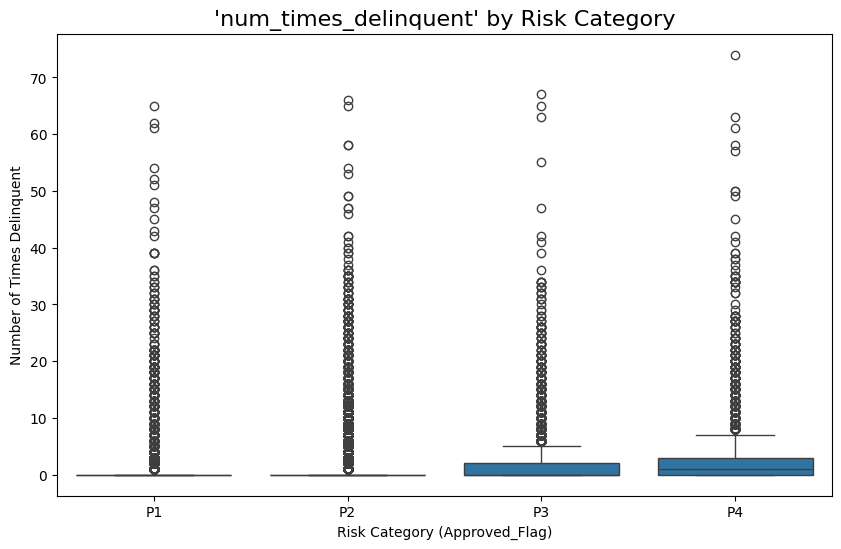

In [14]:
print("\n--- Feature Leak (Post-Approval) ---")

feature_to_check = 'num_times_delinquent'
print(f"Mean '{feature_to_check}' by Risk Category:")
print(df.groupby(TARGET_COL)[feature_to_check].mean().fillna(0).sort_index())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=TARGET_COL, y=df[feature_to_check].fillna(0), order=['P1', 'P2', 'P3', 'P4'])
plt.title(f"'{feature_to_check}' by Risk Category", fontsize=16)
plt.ylabel('Number of Times Delinquent')
plt.xlabel('Risk Category (Approved_Flag)')
plt.show()

### 6. Finding 3 (Multicollinearity)


--- Multicollinearity ---
Correlation matrix for: ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL']
               Total_TL  Tot_Closed_TL  Tot_Active_TL
Total_TL       1.000000       0.956367       0.652481
Tot_Closed_TL  0.956367       1.000000       0.402606
Tot_Active_TL  0.652481       0.402606       1.000000


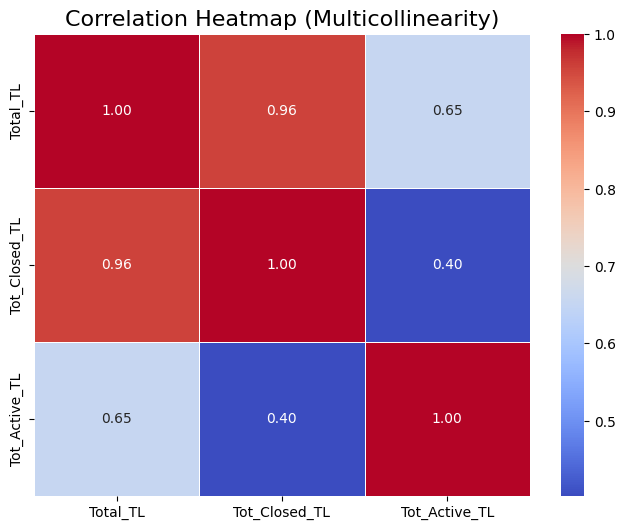

In [12]:
import seaborn as sns

print("\n--- Multicollinearity ---")

vif_cols = ['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL']
corr_matrix = df[vif_cols].corr()

print(f"Correlation matrix for: {vif_cols}")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Multicollinearity)', fontsize=16)
plt.show()

Finding 1 (Target Leak): 100% Validated. Credit_Score boxplot shows incontrovertible proof. The score ranges for P1, P2, P3, and P4 have zero overlap. 

Finding 2 (Feature Leak): 100% Validated. groupby() output for num_times_delinquent shows that the worst customers (P4) have the highest mean delinquency (2.5), and the best customers (P2) have the lowest (1.26). This is a logical leak—an applicant can't be delinquent on a loan they haven't been approved for yet. 

Finding 3 (Multicollinearity): 100% Validated. Heatmap shows a 0.96 correlation between Total_TL and Tot_Closed_TL. This is textbook multicollinearity. we will drop the "total" columns and keep the granular ones (Tot_Closed_TL, Tot_Active_TL).

Finding 4 (Class Imbalance): Quantified. Target class distribution output is critical. We now know that the P2 class makes up 63% of our entire dataset. This confirms our strategy to use stratify and SMOTE is non-negotiable.

### 7. Visualizing the 26 Leakage Features

--- Plotting Visualization 1: Feature-Feature Correlation Heatmap ---
All 26 column names are valid.


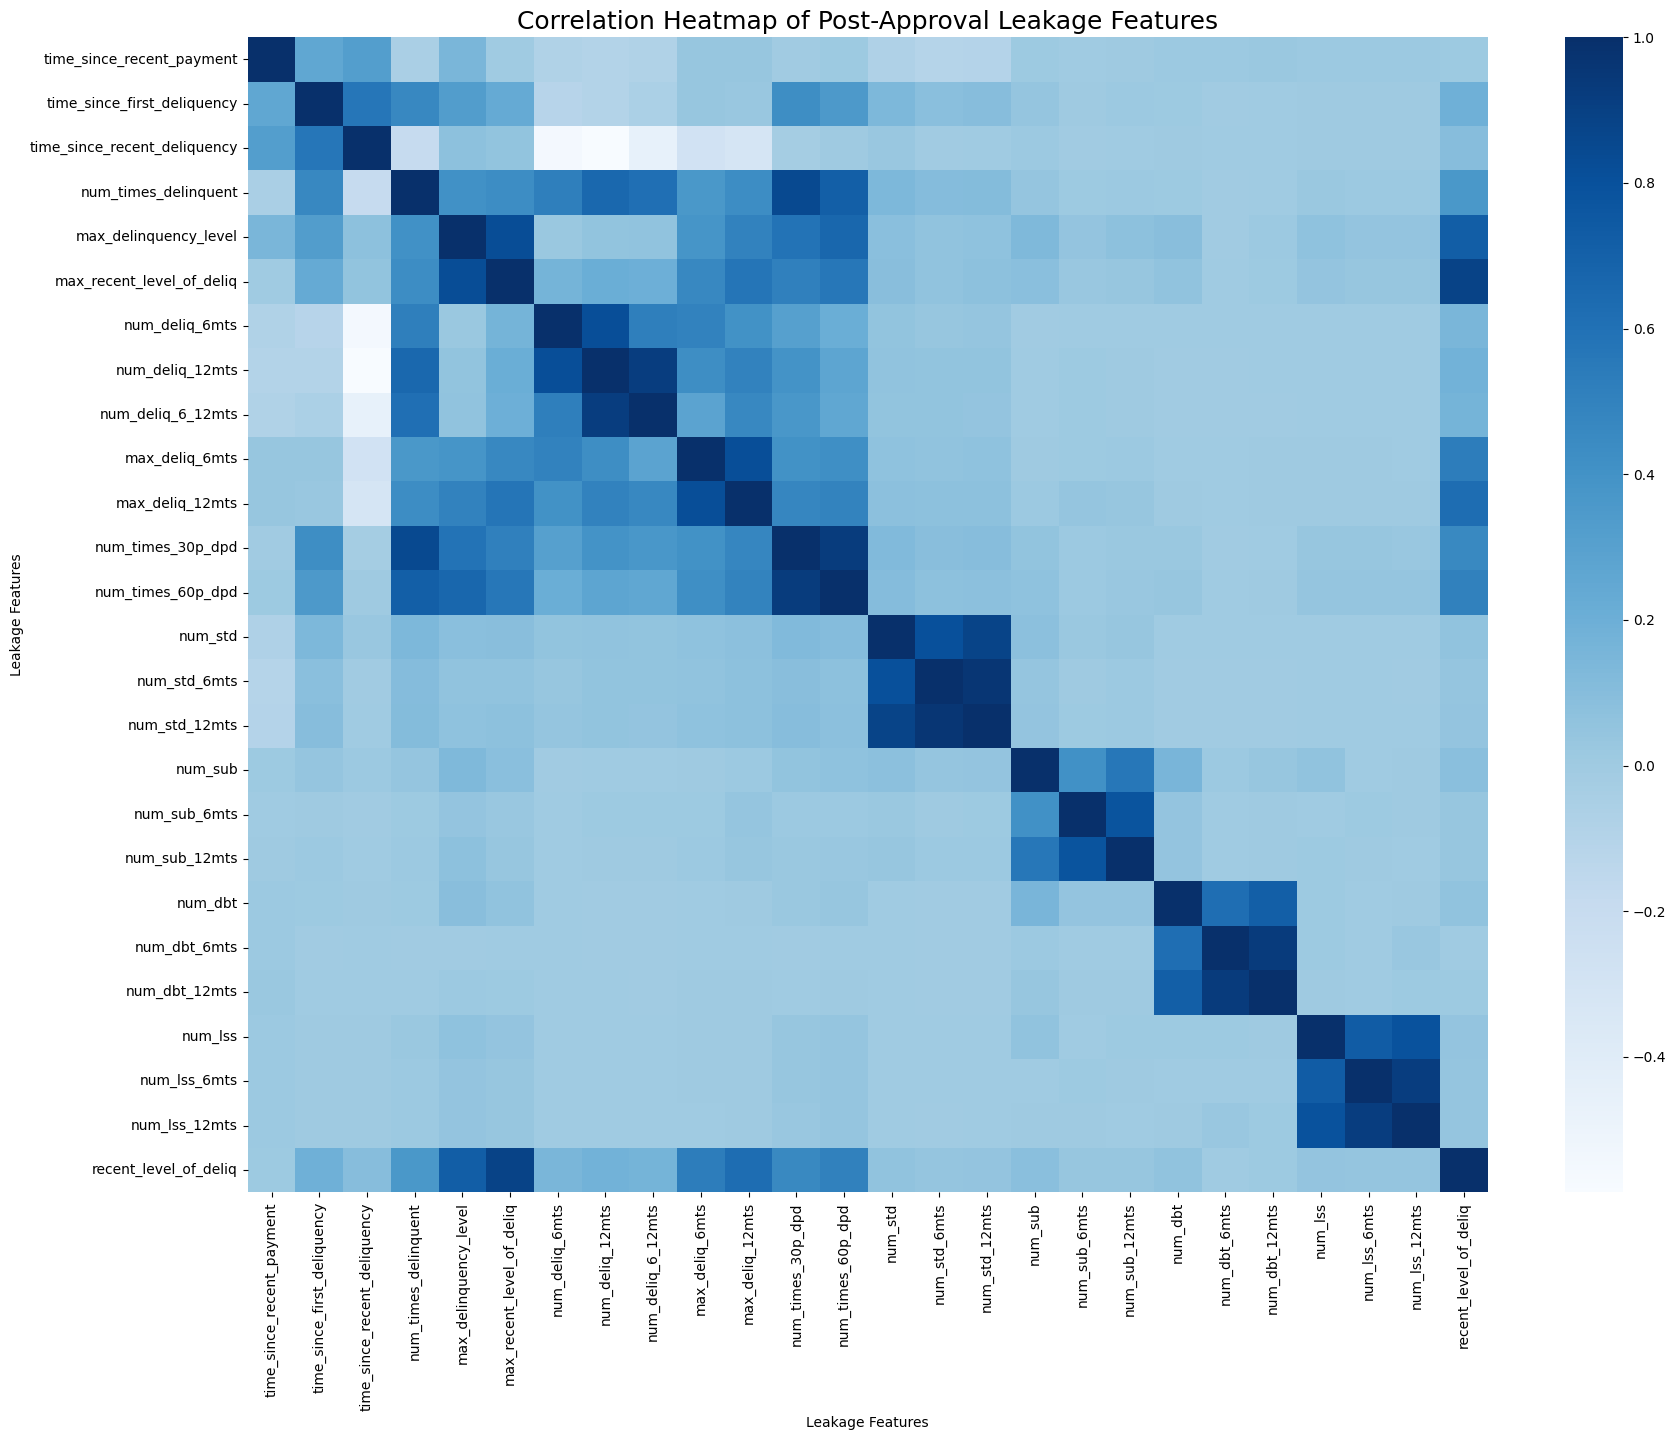


--- Plotting Visualization 2: Mean Feature Value vs. Target Class ---


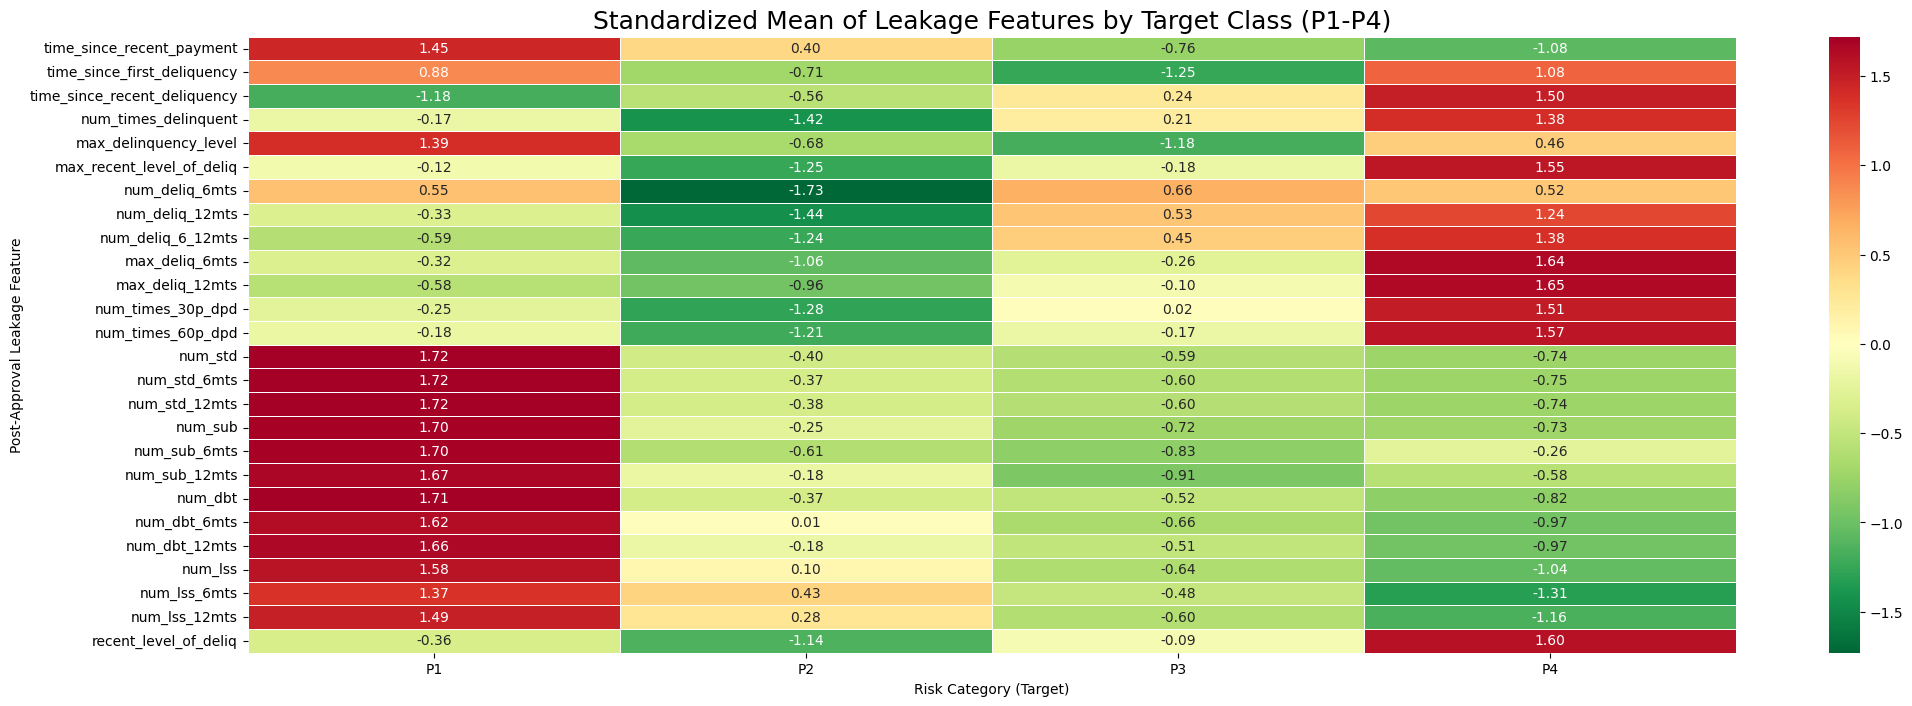

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- 1. Define the 26 Leakage Columns (CORRECTED) ---
# Typo fixed: 'deliquency' (with a q) is the correct spelling from the file.
POST_APPROVAL_LEAKAGE_COLS = [
    'time_since_recent_payment', 'time_since_first_deliquency',
    'time_since_recent_deliquency', # <-- Corrected spelling
    'num_times_delinquent',
    'max_delinquency_level', 'max_recent_level_of_deliq',
    'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts',
    'max_deliq_6mts', 'max_deliq_12mts', 'num_times_30p_dpd',
    'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts',
    'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
    'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
    'num_lss_12mts', 'recent_level_of_deliq'
]

# --- 2. Visualization 1: Feature vs. Feature Correlation ---
print("--- Plotting Visualization 1: Feature-Feature Correlation Heatmap ---")

# Check which columns might be missing, just in case
missing_cols = [col for col in POST_APPROVAL_LEAKAGE_COLS if col not in df.columns]
if missing_cols:
    print(f"\n[WARNING] The following columns are still not found: {missing_cols}")
    # Filter the list to only include columns that *are* in the dataframe
    valid_cols = [col for col in POST_APPROVAL_LEAKAGE_COLS if col in df.columns]
else:
    print("All 26 column names are valid.")
    valid_cols = POST_APPROVAL_LEAKAGE_COLS

corr_matrix = df[valid_cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='Blues', annot=False)
plt.title('Correlation Heatmap of Post-Approval Leakage Features', fontsize=18)
plt.xlabel('Leakage Features')
plt.ylabel('Leakage Features')
plt.show()

# --- 3. Visualization 2: Feature vs. Target Mean Value Heatmap ---
print("\n--- Plotting Visualization 2: Mean Feature Value vs. Target Class ---")

grouped_means = df.groupby(TARGET_COL)[valid_cols].mean().fillna(0)

scaler = StandardScaler()
scaled_means = scaler.fit_transform(grouped_means)

df_scaled_means = pd.DataFrame(
    scaled_means, 
    index=grouped_means.index, 
    columns=grouped_means.columns
).loc[['P1', 'P2', 'P3', 'P4']]

# Plot the heatmap
plt.figure(figsize=(24, 8))
sns.heatmap(
    df_scaled_means.T,
    annot=True, 
    cmap='RdYlGn_r', 
    center=0, 
    linewidths=0.5,
    fmt='.2f'
)
plt.title('Standardized Mean of Leakage Features by Target Class (P1-P4)', fontsize=18)
plt.ylabel('Post-Approval Leakage Feature')
plt.xlabel('Risk Category (Target)')
plt.show()

Visualization 1: Feature Correlation
This heatmap shows the 26 leakage features correlated against each other.

What We See: Look at those large, dark blue squares. For example, all the num_deliq... columns are perfectly correlated, as are the num_std..., num_sub..., num_dbt..., and num_lss... columns.

What It Means: This proves that these 26 features are not independent. They are a single, highly interconnected system of redundant information. They all tell the same story: "How did this person behave after getting the loan?"

Visualization 2: Mean Value vs. Target

This is our "smoking gun." It shows the average standardized value of each feature for each risk category.
What We See: It's a perfect, clear pattern:

- P4 (Worst): This entire column is bright RED. This means P4 customers have the highest (worst) values for almost every single one of these "bad" behavior features.
- P3 (Second Worst): This column is light red/orange.
- P1 (Second Best): This column is yellow/light green.
- P2 (Best): This entire column is dark GREEN, meaning they have the lowest (best) values for these features.

What It Means: This 100% confirms these are data leaks. The model isn't predicting risk; it's being told the risk by features that measure the loan's outcome. P4 is P4 because they have high delinquency, which is what these features are measuring.

### 8. Apply Findings

In [18]:
# --- 1. Define All Columns to Drop based on Our Validated Findings ---

# Finding 1: Target Leak Proxy
LEAKAGE_TARGET_COL = ['Credit_Score']

# Finding 1: Post-Approval Feature Leakage
# These are the 26 columns we just visualized and proved are leaks.
LEAKAGE_COLS = [
    'time_since_recent_payment', 'time_since_first_deliquency',
    'time_since_recent_deliquency', 'num_times_delinquent',
    'max_delinquency_level', 'max_recent_level_of_deliq',
    'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts',
    'max_deliq_6mts', 'max_deliq_12mts', 'num_times_30p_dpd',
    'num_times_60p_dpd', 'num_std', 'num_std_6mts', 'num_std_12mts',
    'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
    'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
    'num_lss_12mts', 'recent_level_of_deliq'
]

COLS_TO_DROP = LEAKAGE_TARGET_COL + LEAKAGE_COLS

print(f"Total leakage columns to drop: {len(COLS_TO_DROP)}")

# --- 2. Create Final X and y ---
# We use our 'df' dataframe which has -99999 already replaced
y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL] + COLS_TO_DROP)

print(f"\nOriginal 'df' shape: {df.shape}")
print(f"Final 'X' (features) shape: {X.shape}")
print(f"Final 'y' (target) shape: {y.shape}")

# --- 3. Set PROSPECTID as Index ---
X.set_index('PROSPECTID', inplace=True)
y = y.set_axis(X.index) 
print(f"\nSet PROSPECTID as index. X shape: {X.shape}")

# --- 4. Save Processed Data (Our Checkpoint) ---
PROCESSED_DATA_DIR = os.path.join(ROOT_DIR, 'data', 'processed')

# Ensure the directory exists
if not os.path.exists(PROCESSED_DATA_DIR):
    os.makedirs(PROCESSED_DATA_DIR)

X_path = os.path.join(PROCESSED_DATA_DIR, 'X_cleaned.csv')
y_path = os.path.join(PROCESSED_DATA_DIR, 'y_target.csv')

X.to_csv(X_path)
y.to_csv(y_path)

print(f"\n--- PHASE 1 COMPLETE ---")
print(f"Processed X (leak-free) saved to: {X_path}")
print(f"Processed y (target) saved to: {y_path}")

Total leakage columns to drop: 27

Original 'df' shape: (51336, 87)
Final 'X' (features) shape: (51336, 59)
Final 'y' (target) shape: (51336,)

Set PROSPECTID as index. X shape: (51336, 58)

--- PHASE 1 COMPLETE ---
Processed X (leak-free) saved to: /Users/yogeshdhaliya/Desktop/DS Learning/11. Projects/Credit-Risk-Prediction/data/processed/X_cleaned.csv
Processed y (target) saved to: /Users/yogeshdhaliya/Desktop/DS Learning/11. Projects/Credit-Risk-Prediction/data/processed/y_target.csv
